In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
device=("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
train_dataset=datasets.MNIST(root='./kaggle/working', train=True, transform=transform, download=True)
test_dataset=datasets.MNIST(root='./kaggle/working', train=False, transform=transform, download=True)

train_loader=DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader=DataLoader(test_dataset, batch_size=128, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]


Extracting ./kaggle/working/MNIST/raw/train-images-idx3-ubyte.gz to ./kaggle/working/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]


Extracting ./kaggle/working/MNIST/raw/train-labels-idx1-ubyte.gz to ./kaggle/working/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]


Extracting ./kaggle/working/MNIST/raw/t10k-images-idx3-ubyte.gz to ./kaggle/working/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.61MB/s]

Extracting ./kaggle/working/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./kaggle/working/MNIST/raw



In [6]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        #Encoder
        self.encoder=nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64), 
            nn.ReLU(),
            nn.Linear(64,32)
        )

        #Decoder
        self.decoder=nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Tanh()
        )
    def forward(self,x):
        x=x.view(-1, 28*28)
        latent=self.encoder(x)
        out=self.decoder(latent)
        return out.view(-1,1,28,28)

In [7]:
model=Autoencoder().to(device)
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(), lr=0.001)

In [8]:
epochs=10
losses=[]

for epoch in range (epochs):
    total_loss=0
    for imgs, _ in train_loader:
        imgs=imgs.to(device)

        #forward pass
        outputs=model(imgs)
        loss=criterion(outputs, imgs)

        #backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss+=loss.item()

    avg_loss=total_loss/len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")


Epoch [1/10], Loss: 0.1824
Epoch [2/10], Loss: 0.0939
Epoch [3/10], Loss: 0.0777
Epoch [4/10], Loss: 0.0689
Epoch [5/10], Loss: 0.0628
Epoch [6/10], Loss: 0.0573
Epoch [7/10], Loss: 0.0532
Epoch [8/10], Loss: 0.0497
Epoch [9/10], Loss: 0.0470
Epoch [10/10], Loss: 0.0449


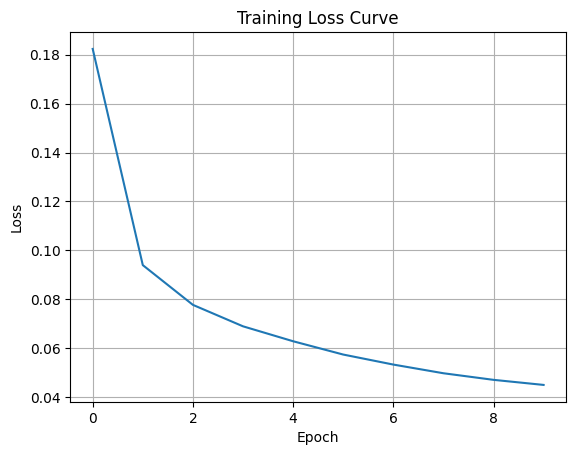

In [9]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid()
plt.show()

In [10]:
def show_images(original, reconstructed, n=10):
    original = original[:n]
    reconstructed = reconstructed[:n]

    original = original.cpu().detach()
    reconstructed = reconstructed.cpu().detach()

    fig, axes = plt.subplots(2, n, figsize=(n*1.5, 3))
    for i in range(n):
        axes[0, i].imshow(original[i][0], cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(reconstructed[i][0], cmap='gray')
        axes[1, i].axis('off')
    plt.suptitle("Top: Original | Bottom: Reconstructed")
    plt.show()


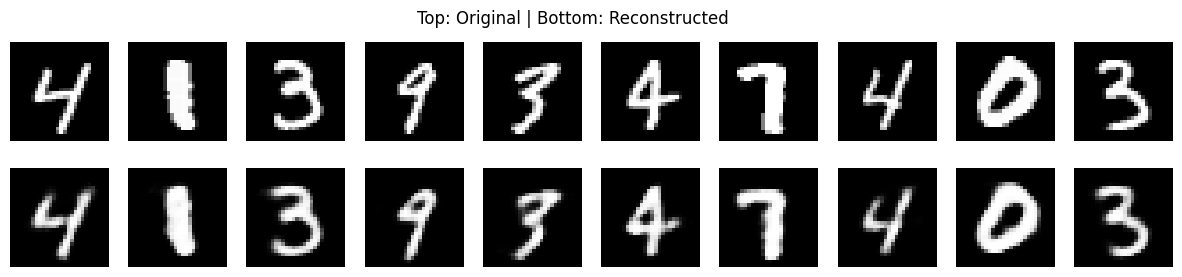

In [11]:
# Inference on test set
model.eval()
test_imgs, _ = next(iter(test_loader))
test_imgs = test_imgs.to(device)
with torch.no_grad():
    recon_imgs = model(test_imgs)

show_images(test_imgs, recon_imgs)

In [12]:
epochs=20
losses=[]

for epoch in range (epochs):
    total_loss=0
    for imgs, _ in train_loader:
        imgs=imgs.to(device)

        #forward pass
        outputs=model(imgs)
        loss=criterion(outputs, imgs)

        #backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss+=loss.item()

    avg_loss=total_loss/len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")


Epoch [1/20], Loss: 0.0434
Epoch [2/20], Loss: 0.0421
Epoch [3/20], Loss: 0.0408
Epoch [4/20], Loss: 0.0396
Epoch [5/20], Loss: 0.0385
Epoch [6/20], Loss: 0.0376
Epoch [7/20], Loss: 0.0367
Epoch [8/20], Loss: 0.0359
Epoch [9/20], Loss: 0.0352
Epoch [10/20], Loss: 0.0344
Epoch [11/20], Loss: 0.0339
Epoch [12/20], Loss: 0.0333
Epoch [13/20], Loss: 0.0327
Epoch [14/20], Loss: 0.0321
Epoch [15/20], Loss: 0.0316
Epoch [16/20], Loss: 0.0312
Epoch [17/20], Loss: 0.0307
Epoch [18/20], Loss: 0.0304
Epoch [19/20], Loss: 0.0301
Epoch [20/20], Loss: 0.0297


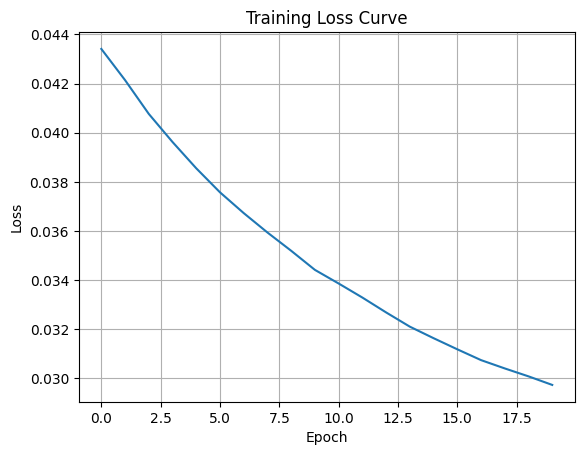

In [13]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid()
plt.show()

In [14]:
def show_images(original, reconstructed, n=10):
    original = original[:n]
    reconstructed = reconstructed[:n]

    original = original.cpu().detach()
    reconstructed = reconstructed.cpu().detach()

    fig, axes = plt.subplots(2, n, figsize=(n*1.5, 3))
    for i in range(n):
        axes[0, i].imshow(original[i][0], cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(reconstructed[i][0], cmap='gray')
        axes[1, i].axis('off')
    plt.suptitle("Top: Original | Bottom: Reconstructed")
    plt.show()


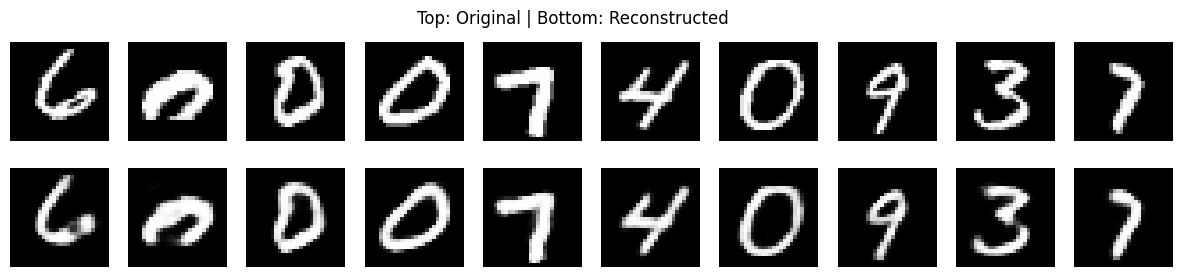

In [15]:
# Inference on test set
model.eval()
test_imgs, _ = next(iter(test_loader))
test_imgs = test_imgs.to(device)
with torch.no_grad():
    recon_imgs = model(test_imgs)

show_images(test_imgs, recon_imgs)

In [16]:
epochs=30
losses=[]

for epoch in range (epochs):
    total_loss=0
    for imgs, _ in train_loader:
        imgs=imgs.to(device)

        #forward pass
        outputs=model(imgs)
        loss=criterion(outputs, imgs)

        #backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss+=loss.item()

    avg_loss=total_loss/len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")


Epoch [1/30], Loss: 0.0295
Epoch [2/30], Loss: 0.0293
Epoch [3/30], Loss: 0.0291
Epoch [4/30], Loss: 0.0288
Epoch [5/30], Loss: 0.0287
Epoch [6/30], Loss: 0.0285
Epoch [7/30], Loss: 0.0283
Epoch [8/30], Loss: 0.0282
Epoch [9/30], Loss: 0.0280
Epoch [10/30], Loss: 0.0279
Epoch [11/30], Loss: 0.0278
Epoch [12/30], Loss: 0.0275
Epoch [13/30], Loss: 0.0273
Epoch [14/30], Loss: 0.0272
Epoch [15/30], Loss: 0.0271
Epoch [16/30], Loss: 0.0269
Epoch [17/30], Loss: 0.0268
Epoch [18/30], Loss: 0.0266
Epoch [19/30], Loss: 0.0265
Epoch [20/30], Loss: 0.0264
Epoch [21/30], Loss: 0.0263
Epoch [22/30], Loss: 0.0262
Epoch [23/30], Loss: 0.0261
Epoch [24/30], Loss: 0.0259
Epoch [25/30], Loss: 0.0258
Epoch [26/30], Loss: 0.0257
Epoch [27/30], Loss: 0.0255
Epoch [28/30], Loss: 0.0254
Epoch [29/30], Loss: 0.0253
Epoch [30/30], Loss: 0.0252


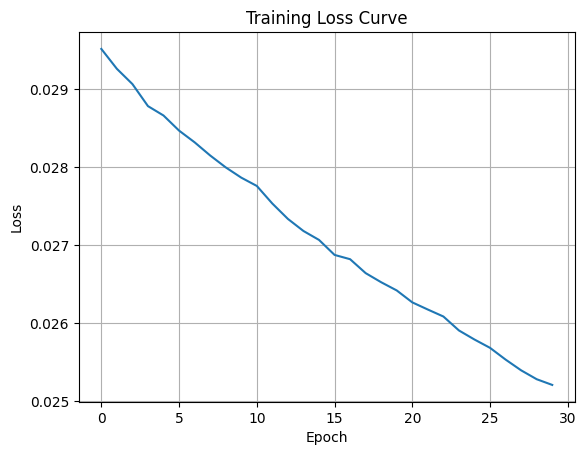

In [17]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid()
plt.show()

In [18]:
def show_images(original, reconstructed, n=10):
    original = original[:n]
    reconstructed = reconstructed[:n]

    original = original.cpu().detach()
    reconstructed = reconstructed.cpu().detach()

    fig, axes = plt.subplots(2, n, figsize=(n*1.5, 3))
    for i in range(n):
        axes[0, i].imshow(original[i][0], cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(reconstructed[i][0], cmap='gray')
        axes[1, i].axis('off')
    plt.suptitle("Top: Original | Bottom: Reconstructed")
    plt.show()


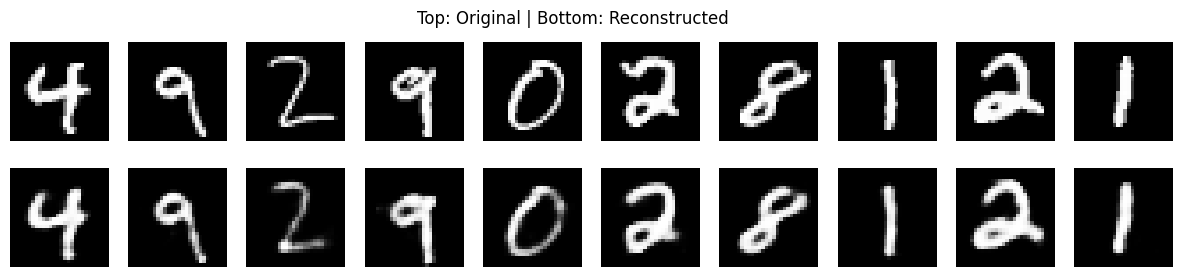

In [19]:
# Inference on test set
model.eval()
test_imgs, _ = next(iter(test_loader))
test_imgs = test_imgs.to(device)
with torch.no_grad():
    recon_imgs = model(test_imgs)

show_images(test_imgs, recon_imgs)

In [20]:
epochs=50
losses=[]

for epoch in range (epochs):
    total_loss=0
    for imgs, _ in train_loader:
        imgs=imgs.to(device)

        #forward pass
        outputs=model(imgs)
        loss=criterion(outputs, imgs)

        #backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss+=loss.item()

    avg_loss=total_loss/len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")


Epoch [1/50], Loss: 0.0251
Epoch [2/50], Loss: 0.0250
Epoch [3/50], Loss: 0.0249
Epoch [4/50], Loss: 0.0249
Epoch [5/50], Loss: 0.0247
Epoch [6/50], Loss: 0.0247
Epoch [7/50], Loss: 0.0247
Epoch [8/50], Loss: 0.0246
Epoch [9/50], Loss: 0.0245
Epoch [10/50], Loss: 0.0245
Epoch [11/50], Loss: 0.0244
Epoch [12/50], Loss: 0.0244
Epoch [13/50], Loss: 0.0243
Epoch [14/50], Loss: 0.0242
Epoch [15/50], Loss: 0.0242
Epoch [16/50], Loss: 0.0242
Epoch [17/50], Loss: 0.0241
Epoch [18/50], Loss: 0.0240
Epoch [19/50], Loss: 0.0241
Epoch [20/50], Loss: 0.0240
Epoch [21/50], Loss: 0.0240
Epoch [22/50], Loss: 0.0239
Epoch [23/50], Loss: 0.0239
Epoch [24/50], Loss: 0.0239
Epoch [25/50], Loss: 0.0238
Epoch [26/50], Loss: 0.0239
Epoch [27/50], Loss: 0.0238
Epoch [28/50], Loss: 0.0238
Epoch [29/50], Loss: 0.0237
Epoch [30/50], Loss: 0.0238
Epoch [31/50], Loss: 0.0237
Epoch [32/50], Loss: 0.0237
Epoch [33/50], Loss: 0.0236
Epoch [34/50], Loss: 0.0237
Epoch [35/50], Loss: 0.0236
Epoch [36/50], Loss: 0.0236
E

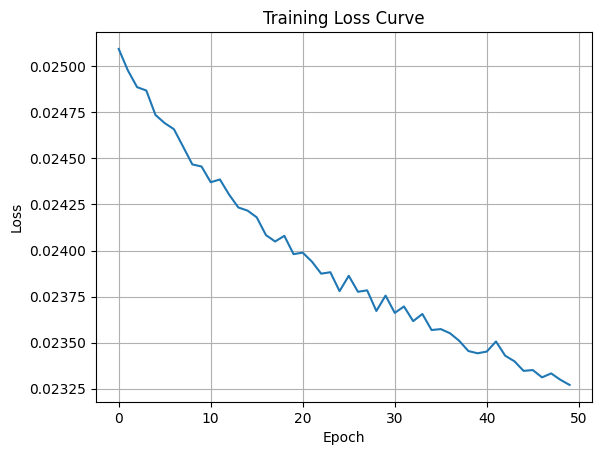

In [21]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid()
plt.show()

In [22]:
def show_images(original, reconstructed, n=10):
    original = original[:n]
    reconstructed = reconstructed[:n]

    original = original.cpu().detach()
    reconstructed = reconstructed.cpu().detach()

    fig, axes = plt.subplots(2, n, figsize=(n*1.5, 3))
    for i in range(n):
        axes[0, i].imshow(original[i][0], cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(reconstructed[i][0], cmap='gray')
        axes[1, i].axis('off')
    plt.suptitle("Top: Original | Bottom: Reconstructed")
    plt.show()


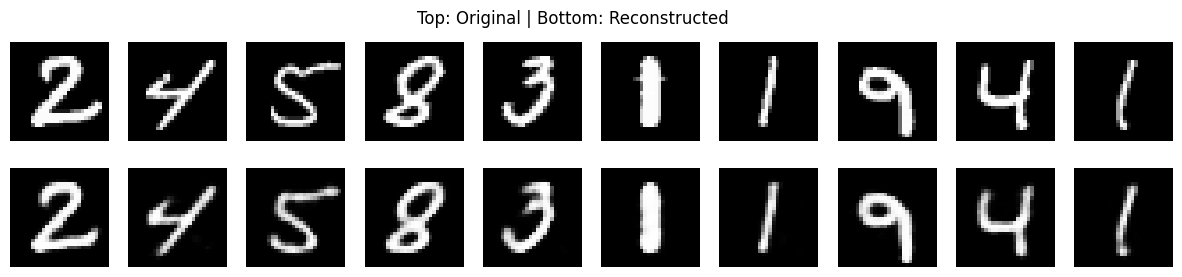

In [23]:
# Inference on test set
model.eval()
test_imgs, _ = next(iter(test_loader))
test_imgs = test_imgs.to(device)
with torch.no_grad():
    recon_imgs = model(test_imgs)

show_images(test_imgs, recon_imgs)